In [64]:
import pandas as pd
from datetime import datetime
from dateutil import parser
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clustering

In [65]:
caltech = pd.read_csv("caltech.csv")

In [66]:
caltech.head()

,Unnamed: 0,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,totalChargingTime,totalConnectionTime
0,0,5bc90cb9f9af8b0d7fe77cd2,39,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,NaN,7986.0,7926.0
1,1,5bc90cb9f9af8b0d7fe77cd3,39,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,NaN,10745.0,40266.0
2,2,5bc90cb9f9af8b0d7fe77cd4,39,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,NaN,3954.0,33535.0
3,3,5bc90cb9f9af8b0d7fe77cd5,39,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,NaN,5296.0,33508.0
4,4,5bc90cb9f9af8b0d7fe77cd6,39,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,NaN,10796.0,30158.0


In [67]:
#Removing Unnnecessary Columns 
caltech.drop(columns = ["Unnamed: 0"], inplace = True)
dropCols = []

In [68]:
dropCols.append("siteID")
dropCols.append("clusterID")
dropCols.append("timezone")
dropCols.append("spaceID")
dropCols.append("stationID")
dropCols.append("userID")
dropCols.append("userInputs")
dropCols.append("_id")
dropCols.append("sessionID")
caltech.drop(columns = dropCols, inplace = True)


In [69]:
caltech.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986.0,7926.0
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745.0,40266.0
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954.0,33535.0
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296.0,33508.0
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796.0,30158.0


In [70]:
caltech.columns

Index(['connectionTime', 'disconnectTime', 'doneChargingTime', 'kWhDelivered',
       'totalChargingTime', 'totalConnectionTime'],
      dtype='object')

In [71]:
caltech.connectionTime[0]

'2018-04-25 11:08:04'

In [72]:
def timeToInt(stamp):
    stamp = parser.parse(stamp)
    return int(stamp.strftime("%H%M%S"))

In [73]:
stamp = parser.parse(caltech.connectionTime[0])
hours = stamp.hour * 60 * 60
mins = stamp.minute * 60
secs = stamp.second
hours + mins + secs

40084

In [74]:
timeToInt(caltech.connectionTime[0])

110804

In [75]:
connectionTimes = list(caltech.connectionTime)
type(connectionTimes[0])


str

In [76]:
originalConnectionTimes = connectionTimes[::]

In [77]:
for idx in range(len(connectionTimes)):
    connectionTimes[idx] = timeToInt(connectionTimes[idx])

In [78]:
disconnectTimes = list(caltech.disconnectTime)
originalDisconnectTimes = disconnectTimes[::]

In [79]:
disconnectTimes = list(caltech.disconnectTime)
for idx in range(len(disconnectTimes)):
    disconnectTimes[idx] = timeToInt(disconnectTimes[idx])

In [80]:
doneChargingTimes = list(caltech.doneChargingTime)
originalDoneChargingTimes = doneChargingTimes[::]

In [81]:
doneChargingTimes = list(caltech.doneChargingTime)
for idx in range(len(doneChargingTimes)):
    try:
        doneChargingTimes[idx] = timeToInt(doneChargingTimes[idx])
    except:
        continue

In [82]:
caltech["connTime"] = connectionTimes

In [83]:
caltech["disconnTime"] = disconnectTimes
caltech["doneTime"] = doneChargingTimes

In [84]:
doneChargingTimes.count(0)

2

In [85]:
caltech.shape, caltech.dropna(subset = ["doneTime"]).shape

((31424, 9), (29369, 9))

In [86]:
caltech.head()

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986.0,7926.0,110804,132010,132110.0
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745.0,40266.0,134510,5616,164415.0
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954.0,33535.0,134550,230445,145144.0
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296.0,33508.0,143706,235534,160522.0
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796.0,30158.0,144034,230312,174030.0


In [87]:
caltechDf = caltech.dropna(subset = ["doneTime"]).copy()

In [88]:
caltechDf

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986.0,7926.0,110804,132010,132110.0
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745.0,40266.0,134510,5616,164415.0
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954.0,33535.0,134550,230445,145144.0
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296.0,33508.0,143706,235534,160522.0
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796.0,30158.0,144034,230312,174030.0
...,...,...,...,...,...,...,...,...,...
31416,2021-09-13 19:43:16,2021-09-14 01:34:43,2021-09-14 00:28:06,16.370,17090.0,21087.0,194316,13443,2806.0
31417,2021-09-13 19:53:30,2021-09-13 22:33:34,2021-09-13 20:56:33,2.902,3783.0,9604.0,195330,223334,205633.0
31419,2021-09-13 21:12:53,2021-09-14 00:25:36,2021-09-13 21:41:31,2.285,1718.0,11563.0,211253,2536,214131.0
31420,2021-09-13 21:17:04,2021-09-14 01:01:49,2021-09-13 23:18:07,6.715,7263.0,13485.0,211704,10149,231807.0


In [89]:
def dropOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1    

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    return df.loc[filter]  

In [90]:
caltechDf.shape

(29369, 9)

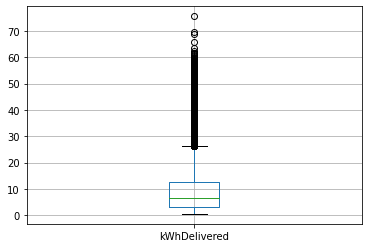

In [91]:
caltechDf.boxplot("kWhDelivered")

In [92]:
dropOutliers(caltechDf, "kWhDelivered")

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986.0,7926.0,110804,132010,132110.0
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745.0,40266.0,134510,5616,164415.0
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954.0,33535.0,134550,230445,145144.0
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296.0,33508.0,143706,235534,160522.0
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796.0,30158.0,144034,230312,174030.0
...,...,...,...,...,...,...,...,...,...
31416,2021-09-13 19:43:16,2021-09-14 01:34:43,2021-09-14 00:28:06,16.370,17090.0,21087.0,194316,13443,2806.0
31417,2021-09-13 19:53:30,2021-09-13 22:33:34,2021-09-13 20:56:33,2.902,3783.0,9604.0,195330,223334,205633.0
31419,2021-09-13 21:12:53,2021-09-14 00:25:36,2021-09-13 21:41:31,2.285,1718.0,11563.0,211253,2536,214131.0
31420,2021-09-13 21:17:04,2021-09-14 01:01:49,2021-09-13 23:18:07,6.715,7263.0,13485.0,211704,10149,231807.0


In [93]:
caltechDf = dropOutliers(caltechDf, "kWhDelivered")

In [94]:
# totalChargingTime	totalConnectionTime	connTime	disconnTime	doneTime

In [95]:
caltechDf = dropOutliers(caltechDf, "totalConnectionTime")

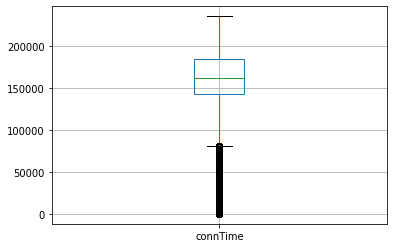

In [96]:
caltechDf.boxplot("connTime")

In [97]:
# originalConnectionTime = list(caltechDf.connectionTime)
# originalDisconnectTime = list(caltechDf.disconnectTime)
# originalDoneChargingTime = list(caltechDf.doneChargingTime)

In [98]:
# caltechDf.drop(columns = ["connectionTime", "disconnectTime", "doneChargingTime"], inplace = True)

In [99]:
caltechDf["doneTime"] = caltechDf["doneTime"].astype(int)

In [100]:
caltechDf["totalConnectionTime"] = caltechDf["totalConnectionTime"].astype(int)
caltechDf["totalChargingTime"] = caltechDf["totalChargingTime"].astype(int)

In [101]:
caltechDf

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986,7926,110804,132010,132110
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745,40266,134510,5616,164415
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954,33535,134550,230445,145144
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296,33508,143706,235534,160522
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796,30158,144034,230312,174030
...,...,...,...,...,...,...,...,...,...
31416,2021-09-13 19:43:16,2021-09-14 01:34:43,2021-09-14 00:28:06,16.370,17090,21087,194316,13443,2806
31417,2021-09-13 19:53:30,2021-09-13 22:33:34,2021-09-13 20:56:33,2.902,3783,9604,195330,223334,205633
31419,2021-09-13 21:12:53,2021-09-14 00:25:36,2021-09-13 21:41:31,2.285,1718,11563,211253,2536,214131
31420,2021-09-13 21:17:04,2021-09-14 01:01:49,2021-09-13 23:18:07,6.715,7263,13485,211704,10149,231807


In [102]:
caltechDf.kWhDelivered[10] * 1000

6955.0

In [103]:
kiloWatts = list(caltechDf.kWhDelivered)

In [104]:
watts = [int(i * 1000) for i in kiloWatts]

In [105]:
sum = 0
for i, j in zip(kiloWatts, watts):
     print(i, j)

Streaming output truncated to the last 5000 lines.
0.881 881
14.091 14091
0.834 834
0.881 881
4.395 4395
8.109 8109
1.836 1836
12.456 12456
7.892 7892
5.159 5159
5.913 5913
14.804 14804
13.082 13082
8.9 8900
0.871 871
3.204 3204
16.055 16055
15.849 15849
4.664 4664
4.656 4656
16.378 16378
22.645 22645
15.926 15926
4.874 4874
23.251 23251
7.212 7212
7.887 7887
0.863 863
1.855 1855
11.191 11191
13.925 13925
6.747 6747
2.903 2903
0.903 903
1.291 1291
2.58 2580
0.862 862
3.357 3357
11.664 11664
0.824 824
0.77 770
1.448 1448
0.882 882
0.893 893
0.682 682
14.898 14898
3.738 3738
12.523 12523
0.893 893
0.871 871
1.099 1099
7.868 7868
7.3 7300
1.028 1028
0.871 871
5.518 5518
17.383 17383
0.865 865
7.892 7892
3.74 3740
0.882 882
7.888 7888
6.652 6652
0.942 942
1.679 1679
7.883 7883
0.892 892
11.609 11609
11.548 11548
10.059 10059
12.989 12989
11.826 11826
8.753 8753
17.536 17536
6.564 6564
1.862 1862
4.378 4378
0.658 658
12.497 12497
0.584 584
2.099 2099
5.89 5890
2.574 2574
15.928 15928
1.539 

In [106]:
caltechDf["wHdelievered"] = watts

In [107]:
caltechDf

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered
0,2018-04-25 11:08:04,2018-04-25 13:20:10,2018-04-25 13:21:10,7.932,7986,7926,110804,132010,132110,7932
1,2018-04-25 13:45:10,2018-04-26 00:56:16,2018-04-25 16:44:15,10.013,10745,40266,134510,5616,164415,10013
2,2018-04-25 13:45:50,2018-04-25 23:04:45,2018-04-25 14:51:44,5.257,3954,33535,134550,230445,145144,5257
3,2018-04-25 14:37:06,2018-04-25 23:55:34,2018-04-25 16:05:22,5.177,5296,33508,143706,235534,160522,5177
4,2018-04-25 14:40:34,2018-04-25 23:03:12,2018-04-25 17:40:30,10.119,10796,30158,144034,230312,174030,10119
...,...,...,...,...,...,...,...,...,...,...
31416,2021-09-13 19:43:16,2021-09-14 01:34:43,2021-09-14 00:28:06,16.370,17090,21087,194316,13443,2806,16370
31417,2021-09-13 19:53:30,2021-09-13 22:33:34,2021-09-13 20:56:33,2.902,3783,9604,195330,223334,205633,2902
31419,2021-09-13 21:12:53,2021-09-14 00:25:36,2021-09-13 21:41:31,2.285,1718,11563,211253,2536,214131,2285
31420,2021-09-13 21:17:04,2021-09-14 01:01:49,2021-09-13 23:18:07,6.715,7263,13485,211704,10149,231807,6715


In [108]:
timeDiffs = []
originalConnectionTime = list(caltechDf.connectionTime)
originalDisconnectTime = list(caltechDf.disconnectTime)
originalDoneChargingTime = list(caltechDf.doneChargingTime)
for i, j in zip(originalDoneChargingTime, originalConnectionTime):
    dt1 = parser.parse(i)
    dt2 = parser.parse(j)
    diff = dt1 - dt2
    timeDiffs.append(diff)
for idx, i in enumerate(timeDiffs):
    timeDiffs[idx] = i.seconds

In [109]:
timeDiffs[:10]

[7986, 10745, 3954, 5296, 10796, 5678, 13200, 6604, 3424, 11889]

In [110]:
caltechDf["timeDiff"] = timeDiffs

In [111]:
# caltechDf.drop(columns = ["kWhDelivered"], inplace = True)

In [112]:
# count = 0
# timeDiffs[0].seconds
# for i in timeDiffs:
#     if i < 0:
#         count += 1
# print(count)

In [113]:
# dasads

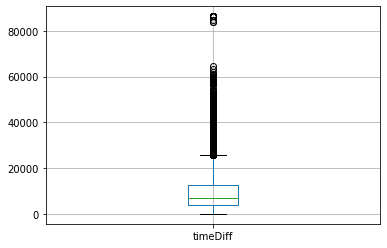

In [114]:
caltechDf.boxplot("timeDiff")

In [115]:
caltechDf[caltechDf.timeDiff > 50000]

,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,totalChargingTime,totalConnectionTime,connTime,disconnTime,doneTime,wHdelievered,timeDiff
100,2018-04-27 01:22:57,2018-04-27 17:44:03,2018-04-27 17:43:11,13.927000,58814,58866,12257,174403,174311,13927,58814
150,2018-04-28 02:01:09,2018-04-28 18:36:51,2018-04-28 18:30:41,14.268000,59372,59742,20109,183651,183041,14268,59372
268,2018-05-01 04:55:59,2018-05-01 19:33:43,2018-05-01 19:32:11,23.007319,52572,52664,45559,193343,193211,23007,52572
492,2018-05-04 19:08:37,2018-05-04 22:07:47,2018-05-04 19:07:40,0.551722,-57,10750,190837,220747,190740,551,86343
494,2018-05-04 19:23:52,2018-05-05 00:04:15,2018-05-04 19:22:52,0.912297,-60,16823,192352,415,192252,912,86340
...,...,...,...,...,...,...,...,...,...,...,...
22910,2019-09-07 00:23:43,2019-09-07 15:33:11,2019-09-07 14:38:20,13.749000,51277,54568,2343,153311,143820,13749,51277
22941,2019-09-09 13:36:51,2019-09-10 05:10:20,2019-09-10 04:20:44,16.451000,53033,56009,133651,51020,42044,16451,53033
24329,2019-10-26 04:44:38,2019-10-26 20:47:04,2019-10-26 19:43:41,3.636000,53943,57746,44438,204704,194341,3636,53943
27906,2020-03-12 20:20:15,2020-03-13 00:22:12,2020-03-12 20:20:06,0.773462,-9,14517,202015,2212,202006,773,86391


In [116]:
caltechDf = dropOutliers(caltechDf, "timeDiff")

In [117]:
originalConnectionTime = list(caltechDf.connectionTime)
originalDisconnectTime = list(caltechDf.disconnectTime)
originalDoneChargingTime = list(caltechDf.doneChargingTime)

In [118]:
caltechDf.drop(columns = ["connectionTime", "disconnectTime", "doneChargingTime"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [119]:
from sklearn.cluster import KMeans

In [120]:
def plotter(dummydf):
    from sklearn.cluster import KMeans
    from dateutil import parser
    #clustering method
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(dummydf)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10,5))
    sns.lineplot(range(1, 11), wcss,marker='o',color='blue')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

    clustersize=int(input())
    #take input here cluster size

    kmeans = KMeans(n_clusters = clustersize, init = 'k-means++', random_state = 42)
    labels = kmeans.fit_predict(dummydf)
    abels = list(labels)
    dummydf["cluster"] = labels
    dummydf

    dummydf["connTime"] = originalConnectionTime
    dummydf["disconnTime"] = originalDisconnectTime
    dummydf["doneTime"] = originalDoneChargingTime
    #Connection Times
    if "connTime" in dummydf.columns:
        cTimes = list(dummydf.connTime)[::]
        for idx, time in enumerate(cTimes):
            dt = parser.parse(time)
            cTimes[idx] = datetime(2020, 1, 1, dt.hour, dt.minute, dt.second)
    #Done Times
    if "doneTime" in dummydf.columns:
        doneTime = list(dummydf.doneTime)[::]
        for idx, time in enumerate(doneTime):
            dt = parser.parse(time)
            doneTime[idx] = datetime(2020, 1, 1, dt.hour, dt.minute, dt.second)
    #Disconnect TImes
    if "disconnTime" in dummydf.columns:
        disTimes = list(dummydf.disconnTime)[::]
        for idx, time in enumerate(disTimes):
            dt = parser.parse(time)
            disTimes[idx] = datetime(2020, 1, 1, dt.hour, 
                                   dt.minute, dt.second)
    dummydf["connTime"] = cTimes
    dummydf["disconnTime"] = disTimes
    dummydf["doneTime"] = doneTime
    timeDiffHrs = list(dummydf.timeDiff)
    
    for idx, val in enumerate(timeDiffHrs):
        timeDiffHrs[idx] = val / (60 * 60)
    dummydf["timeDiff"] = timeDiffHrs
    while True: 
        command = input("Create Plot? ")
        if command == "n" or command == "N":
            break
        print(dummydf.columns)
        x = input("X: ")
        y = input("Y: ")     
        plt.figure(figsize=(15,7))
        cols = ["Red", "Green", "Blue", "Yellow", "Black"]
        for i, col in zip(range(clustersize), cols[:clustersize]):
            sns.scatterplot(dummydf[dummydf["cluster"] == i][x], dummydf[dummydf["cluster"] == i][y], color = col, label = 'Cluster {}'.format(i))
        plt.show()


In [121]:
def runner(d):
    
    df=d.copy()
    decision=input("Drop columns?")
    if decision=='y' or decision=='Y':
        print(df.columns)
        cols=input("Select columns to drop")
        cols=cols.split(" ")
        df.drop(columns=cols,inplace=True)
            
    plotter(df)
    return

In [122]:
data = caltechDf.copy()

Drop columns?y
Index(['kWhDelivered', 'totalChargingTime', 'totalConnectionTime', 'connTime',
       'disconnTime', 'doneTime', 'wHdelievered', 'timeDiff'],
      dtype='object')
Select columns to droptotalChargingTime totalConnectionTime


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


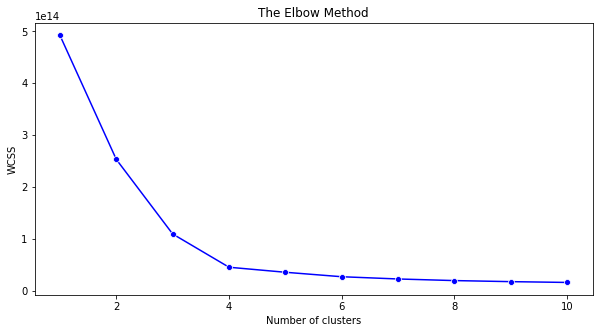

3
Create Plot? y
Index(['kWhDelivered', 'connTime', 'disconnTime', 'doneTime', 'wHdelievered',
       'timeDiff', 'cluster'],
      dtype='object')
X: timeDiff
Y: kWhDelivered


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


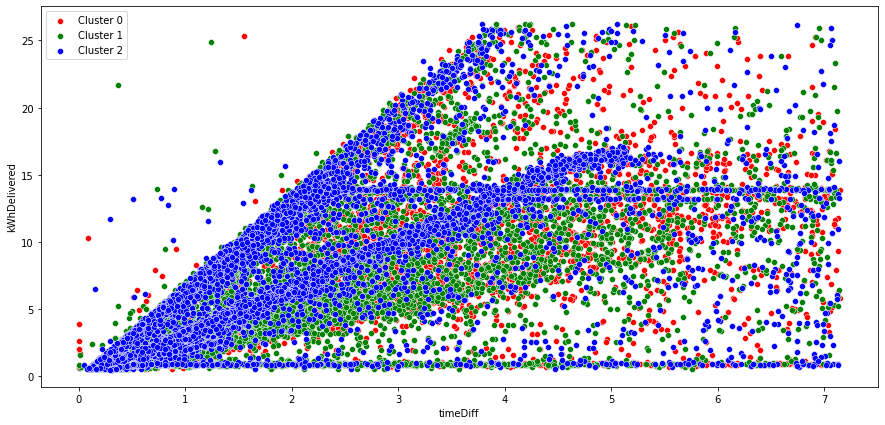

Create Plot? n


In [123]:
runner(data)

Drop columns?y
Index(['kWhDelivered', 'totalChargingTime', 'totalConnectionTime', 'connTime',
       'disconnTime', 'doneTime', 'wHdelievered', 'timeDiff'],
      dtype='object')
Select columns to droptotalChargingTime totalConnectionTime


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


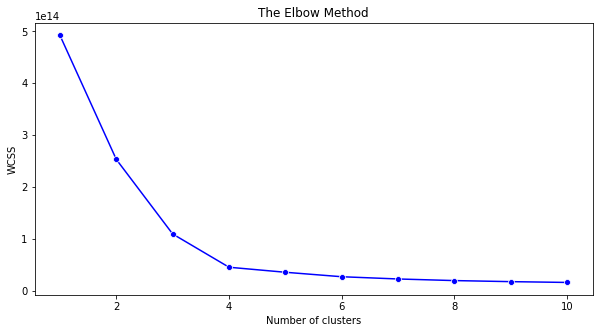

4
Create Plot? y
Index(['kWhDelivered', 'connTime', 'disconnTime', 'doneTime', 'wHdelievered',
       'timeDiff', 'cluster'],
      dtype='object')
X: timeDiff
Y: kWhDelivered


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

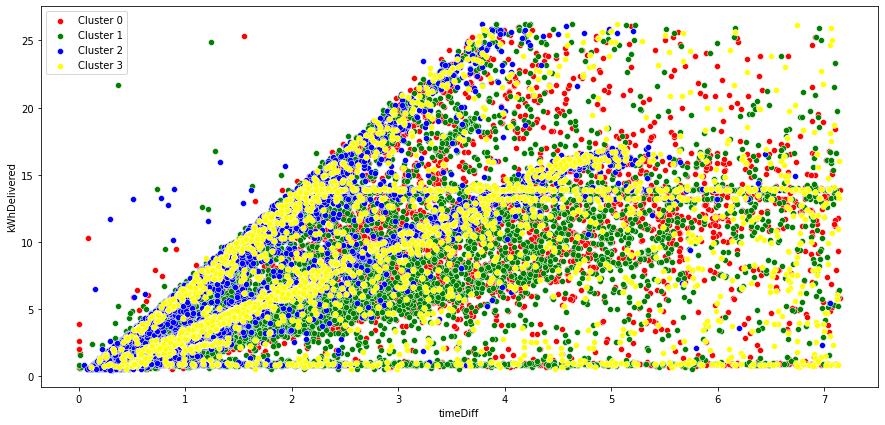

Create Plot? n


In [124]:
runner(data)